In [1]:
import numpy as np
import sympy as sp
import scipy as sc
import matplotlib.pyplot as plt
import iminuit
import scipy.stats as stats
from IPython.display import display, Math, Latex
from scipy.integrate import quad
from scipy.stats import rv_continuous
from iminuit import Minuit, cost
from scipy import stats
from scipy.optimize import curve_fit, root_scalar
import pandas as pd

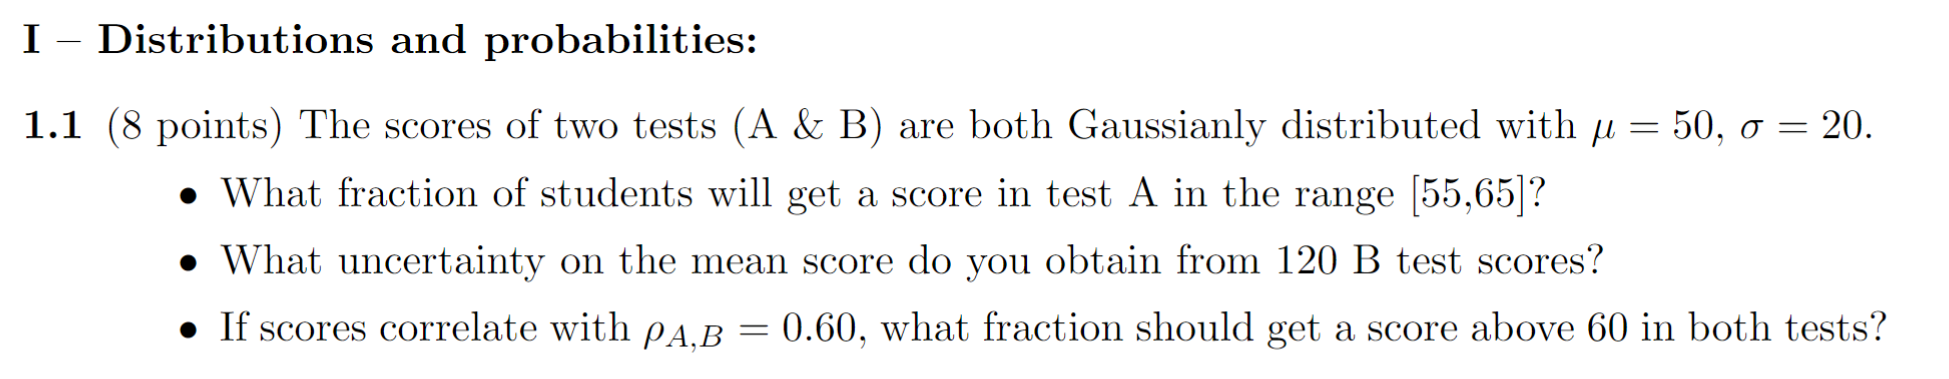

In [7]:
#Two gaussian distributions with mean 50 and sigma 20
gauss_A = stats.norm(50, 20)
gauss_B = stats.norm(50, 20)

#What fraction of students will get a score in test A in the range 55-65?
p_A = gauss_A.cdf(65) - gauss_A.cdf(55)
print(f"The probability of a student getting a score in test A in the range 55-65 is {p_A:.3f}")

#What uncertainty on the mean score do you obtain from 120 B test scores?
n_B = 120
mean_B = gauss_B.mean()
std_B = gauss_B.std()
uncertainty_B = std_B/np.sqrt(n_B)
print(f"The uncertainty on the mean score from 120 B test scores is {uncertainty_B:.3f}")

#If scores correlate, with rho_A,B = 0.6, what fraction should get a score above 60 in both tests?
rho_A_B = 0.6
mu_A = mu_B = 50
std_A = 20
std_B = 20
cov_A_B = [[std_A**2, rho_A_B*std_A*std_B], [rho_A_B*std_A*std_B, std_B**2]]
#Sample a lot of scores
N = 10000
scores = np.random.multivariate_normal([mu_A, mu_B], cov_A_B, N)
#Count how many scores are above 60 in both tests
n_both = np.sum((scores[:,0] > 60) & (scores[:,1] > 60))
p_both = n_both/N
print(f"The fraction of students getting a score above 60 in both tests is {p_both:.3f}")


The probability of a student getting a score in test A in the range 55-65 is 0.175
The uncertainty on the mean score from 120 B test scores is 1.826
The fraction of students getting a score above 60 in both tests is 0.183


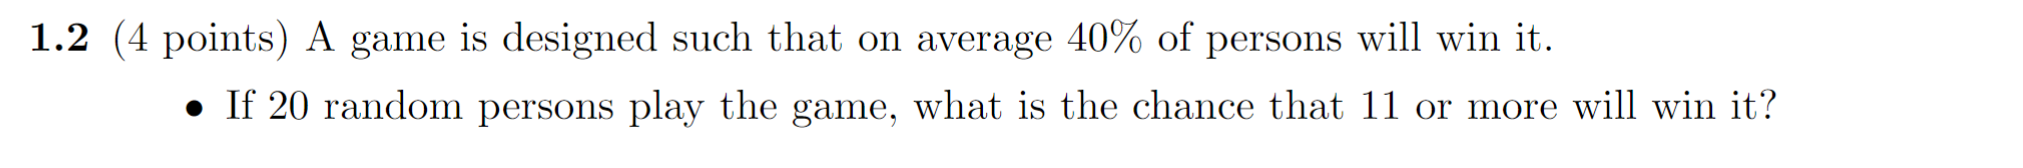

In [8]:
#A game is designed such that on average 40& of players win. If 20 random persons play the game, what is the probability that at least 11 win?
p = 0.4
n = 20
k = 11
p_11_win = stats.binom.sf(k-1, n, p)
print(f"The probability that at least 11 out of 20 random persons win the game is {p_11_win:.3f}")

The probability that at least 11 out of 20 random persons win the game is 0.128


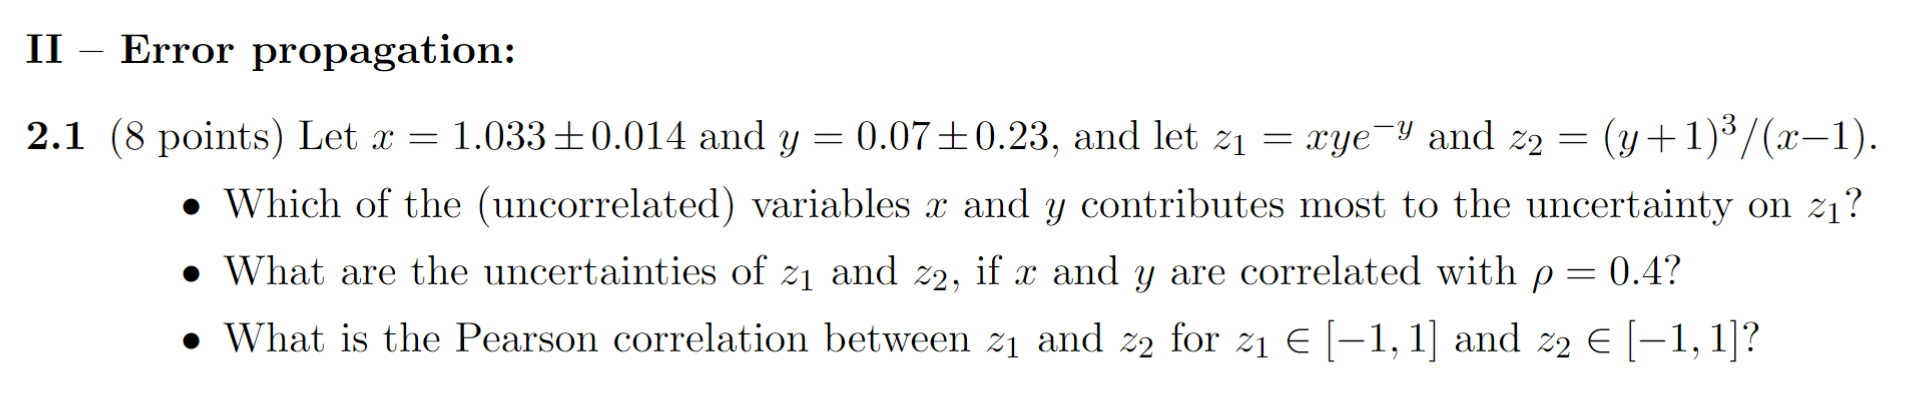

In [10]:
# Let x = 1.033 ± 0.014 and y = 0.07 ± 0.23, and let z1 = xye^−y and z2 = (y + 1)^3/(x−1).
x = 1.033
y = 0.07
x_err = 0.014
y_err = 0.23

#Which of the (uncorrelated) variables x and y contributes most to the uncertainty on z1?
z1 = x*y*np.exp(-y)
z1_x = y*np.exp(-y)
z1_y = x*np.exp(-y) - x*y*np.exp(-y)
uncertainty_z1_x = z1_x*x_err
uncertainty_z1_y = z1_y*y_err
print(f"The uncertainty on z1 due to x is {uncertainty_z1_x:.3f} and due to y is {uncertainty_z1_y:.3f}")

#What are the uncertainties of z1 and z2, if x and y are correlated with ρ = 0.4?
rho =0.4
cov_x_y = [[x_err**2, rho*x_err*y_err], [rho*x_err*y_err, y_err**2]]
z1_x = y*np.exp(-y)
z1_y = x*np.exp(-y) - x*y*np.exp(-y)
z2_x = -(y+1)**3/(x-1)**2
z2_y = 3*(y+1)**2/(x-1)
uncertainty_z1 = np.sqrt(z1_x**2*x_err**2 + z1_y**2*y_err**2 + 2*z1_x*z1_y*cov_x_y[0][1])
uncertainty_z2 = np.sqrt(z2_x**2*x_err**2 + z2_y**2*y_err**2 + 2*z2_x*z2_y*cov_x_y[0][1])
print(f"The uncertainty on z1 is {uncertainty_z1:.3f} and on z2 is {uncertainty_z2:.3f}")


The uncertainty on z1 due to x is 0.001 and due to y is 0.206
The uncertainty on z1 is 0.206 and on z2 is 22.792
